<a href="https://colab.research.google.com/github/ipavlopoulos/dfu/blob/main/DFU_MSTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

In [4]:
%%capture
!git clone https://github.com/ipavlopoulos/dfu.git
from dfu.lib import dfu, to_hist, pdf

# Exploratory 


### Accessing the scored dataframes

In [5]:
# NY
ny = pd.read_csv("dfu/ny.csv", parse_dates=["created_at"])
ny.set_index("created_at", inplace=True)
ny.scores = ny.scores.apply(literal_eval)
# Texas
tx = pd.read_csv("dfu/tx.csv", parse_dates=["created_at"])
tx.set_index("created_at", inplace=True)
tx.scores = tx.scores.apply(literal_eval)

### Computing DFU on the two states

#### NY

From 301 days, 21 are non unimodal


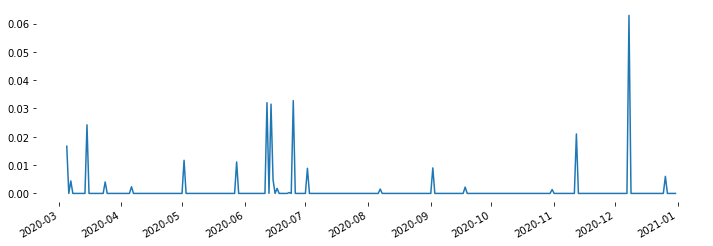

In [6]:
# computing DFU
ny["histogram"] = ny.scores.apply(lambda counts: to_hist(counts, bins_num=10))
ny["DFU"] = ny.histogram.apply(dfu)
# detecting peaks
ny_peaks = ny[ny.DFU>0]
print(f"From {ny.shape[0]} days, {ny_peaks.shape[0]} are non unimodal")
ny.DFU.plot(figsize=(12,4), xlabel="");
sns.despine(left=True, bottom=True)

In [7]:
print(ny_peaks.sort_values("DFU", ascending=False).head(3).DFU)

created_at
2020-12-08 00:00:00+00:00    0.062874
2020-06-25 00:00:00+00:00    0.032779
2020-06-12 00:00:00+00:00    0.032055
Name: DFU, dtype: float64


#### Texas

From 301 days, 13 were found not unimodal


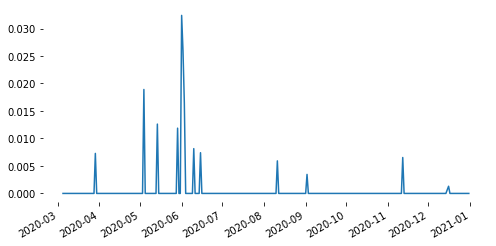

In [8]:
tx["histogram"] = tx.scores.apply(lambda counts: to_hist(counts, bins_num=10))
tx["DFU"] = tx.histogram.apply(dfu)
# detecting peaks
tx_peaks = tx[tx.DFU>0]
print(f"From {tx.shape[0]} days, {tx_peaks.shape[0]} were found not unimodal")
# drawing the TS
ax = tx.DFU.plot(figsize=(8,4), xlabel="");
sns.despine(left=True, bottom=True);

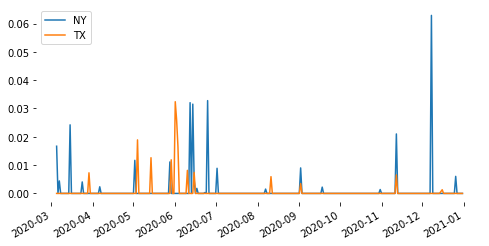

In [9]:
pd.DataFrame({"NY":ny.DFU, "TX":tx.DFU}).plot(figsize=(8,4), xlabel="");
sns.despine(left=True, bottom=True)

In [10]:
print(tx_peaks.sort_values("DFU", ascending=False).head(3).DFU)

created_at
2020-06-01 00:00:00+00:00    0.032389
2020-06-02 00:00:00+00:00    0.026006
2020-05-04 00:00:00+00:00    0.018911
Name: DFU, dtype: float64


* Visualising the __average__ score

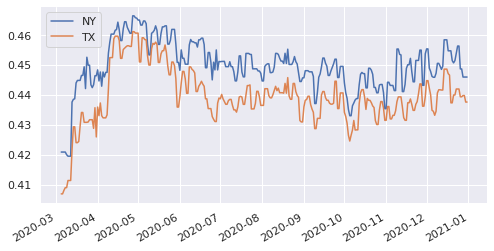

In [ ]:
dea = pd.DataFrame({"NY":ny.scores.apply(np.mean), "TX":tx.scores.apply(np.mean)})
ax = dea.rolling(3, center=True).median().fillna(method='bfill').fillna(method='ffill').plot(xlabel="");
sns.despine(left=True, bottom=True);